# PCA:

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

Note: The 24 variables given in the Rubric is just for performing EDA. You will have to consider the entire dataset, including all the variables for performing PCA. 
Data file - PCA India Data Census.xlsx


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_excel('PCA+India+Data_Census.xlsx',sheet_name='data')

In [18]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [19]:
df.shape

(640, 61)

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.000000,9.000000,18.000000,24.00000,35.000000
Dist.Code,640.0,320.500000,184.896367,1.000000,160.750000,320.500000,480.25000,640.000000
No_HH,640.0,51222.871875,48135.405475,350.000000,19484.000000,35837.000000,68892.00000,310450.000000
TOT_M,640.0,79940.576563,73384.511114,391.000000,30228.000000,58339.000000,107918.50000,485417.000000
TOT_F,640.0,122372.084375,113600.717282,698.000000,46517.750000,87724.500000,164251.75000,750392.000000
...,...,...,...,...,...,...,...,...
NON_WORK_F,640.0,704.778125,910.209225,5.000000,220.500000,464.500000,853.50000,10533.000000
TOT_SC,640.0,34599.339063,36024.593164,0.000000,8964.750000,23654.500000,48389.25000,259736.000000
TOT_ST,640.0,16347.448437,25715.323227,0.000000,742.250000,6220.500000,20738.50000,226904.000000
TOT_LIT,640.0,124327.545313,129917.447816,657.000000,42438.500000,87242.500000,163309.25000,971997.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [22]:
df.State.value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [23]:
Area_name=df['Area Name'].value_counts()

In [24]:
Area_name

Raigarh          2
Bijapur          2
Aurangabad       2
Hamirpur         2
Bilaspur         2
                ..
Darbhanga        1
Muzaffarpur      1
Gopalganj        1
Siwan            1
South Andaman    1
Name: Area Name, Length: 635, dtype: int64

In [25]:
df

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103


In [27]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [28]:
df.duplicated().sum()

0

# EDA

In [121]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure(figsize=[10,5])
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=round(df[column].min())
    b=round(df[column].max())
    freq, bins, patches = plt.hist(df[column], bins=nbins, range=[a,b], edgecolor='Black')
    bin_centers = np.diff(bins)*0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
      n = n+1

    #plt.legend()
    #plt.xticks(range(a,b,round((b-a)/nbins)))
    plt.show;
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    #ax.legend()
    plt.show()

Description of No_HH
----------------------------------------------------------------------------
count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64 Distribution of No_HH
----------------------------------------------------------------------------
BoxPlot of No_HH
----------------------------------------------------------------------------


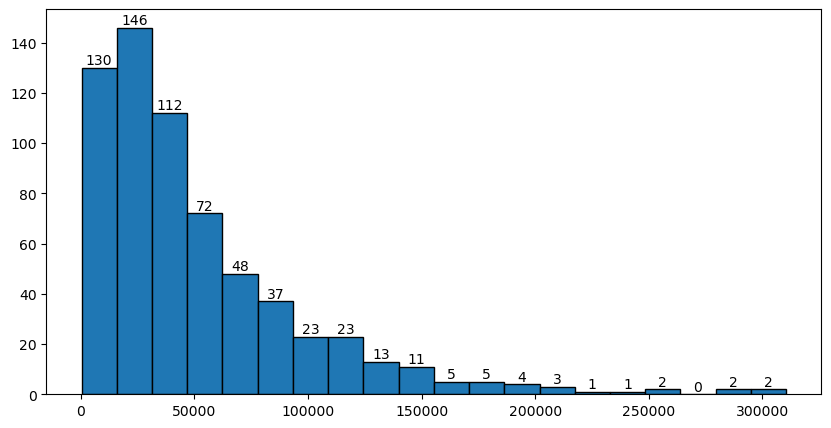

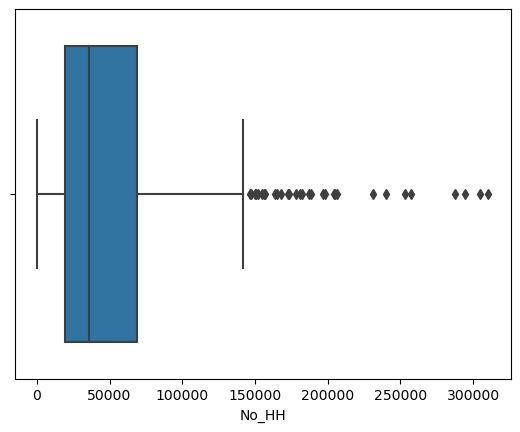

Description of M_LIT
----------------------------------------------------------------------------
count       640.000000
mean      57967.979688
std       55910.282466
min         286.000000
25%       21298.000000
50%       42693.500000
75%       77989.500000
max      403261.000000
Name: M_LIT, dtype: float64 Distribution of M_LIT
----------------------------------------------------------------------------
BoxPlot of M_LIT
----------------------------------------------------------------------------


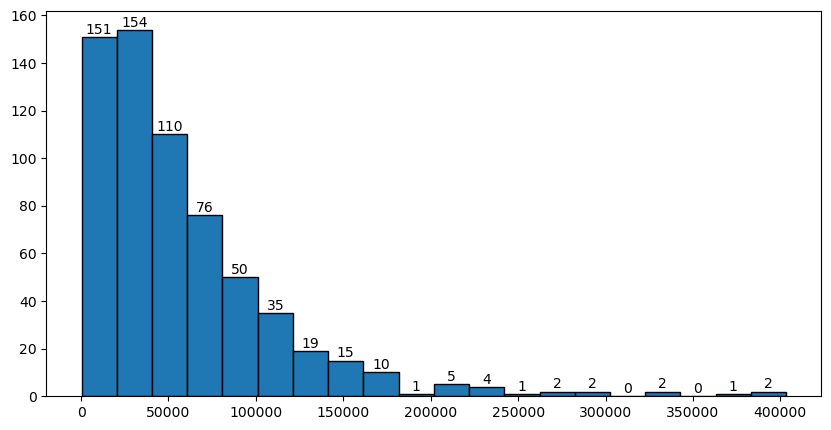

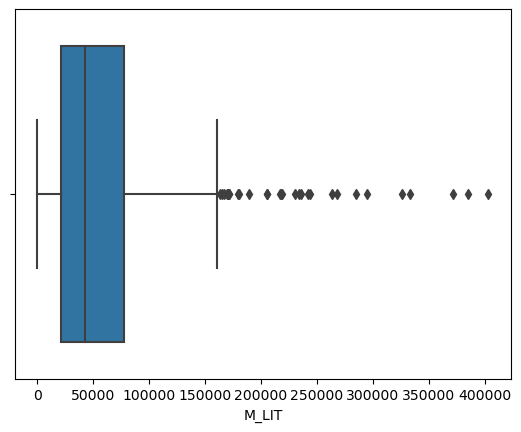

Description of F_LIT
----------------------------------------------------------------------------
count       640.000000
mean      66359.565625
std       75037.860207
min         371.000000
25%       20932.000000
50%       43796.500000
75%       84799.750000
max      571140.000000
Name: F_LIT, dtype: float64 Distribution of F_LIT
----------------------------------------------------------------------------
BoxPlot of F_LIT
----------------------------------------------------------------------------


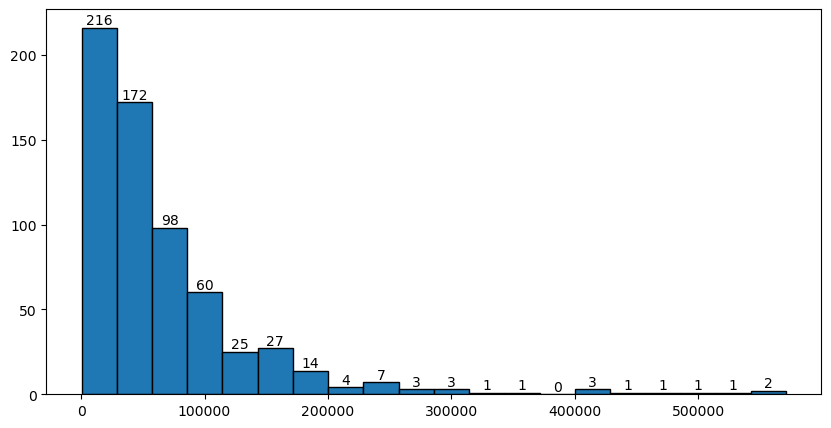

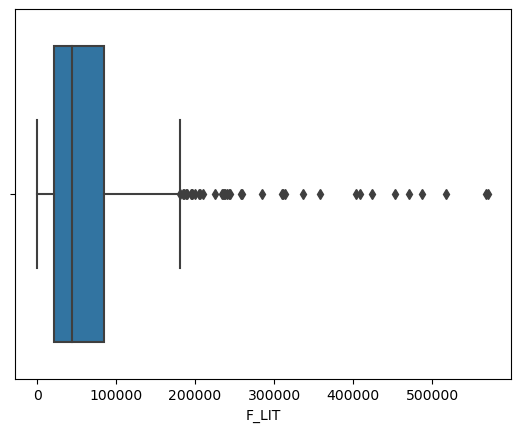

Description of TOT_WORK_M
----------------------------------------------------------------------------
count       640.000000
mean      37992.407813
std       36419.537491
min         100.000000
25%       13753.500000
50%       27936.500000
75%       50226.750000
max      269422.000000
Name: TOT_WORK_M, dtype: float64 Distribution of TOT_WORK_M
----------------------------------------------------------------------------
BoxPlot of TOT_WORK_M
----------------------------------------------------------------------------


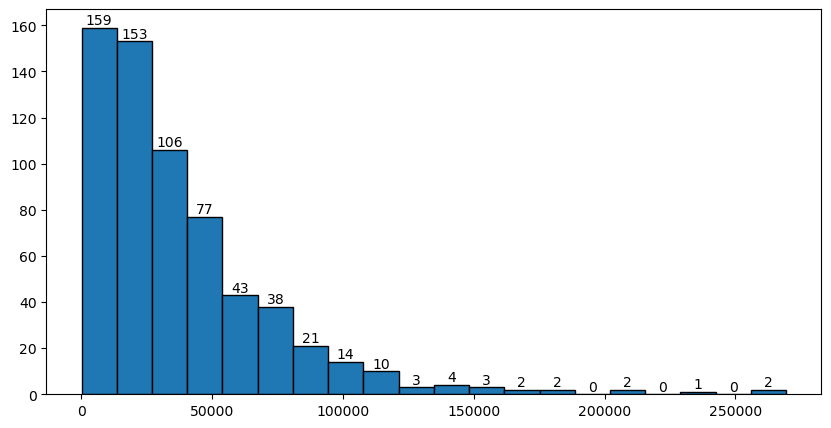

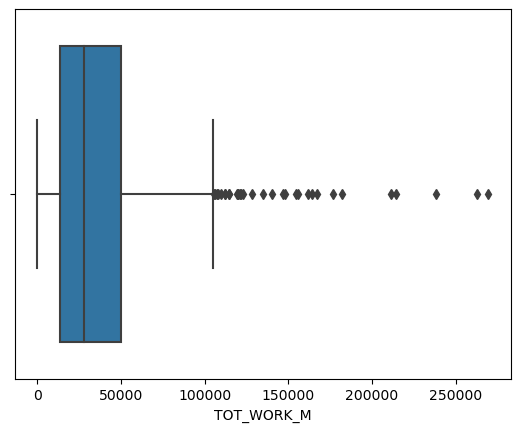

Description of TOT_WORK_F
----------------------------------------------------------------------------
count       640.000000
mean      41295.760938
std       37192.360943
min         357.000000
25%       16097.750000
50%       30588.500000
75%       53234.250000
max      257848.000000
Name: TOT_WORK_F, dtype: float64 Distribution of TOT_WORK_F
----------------------------------------------------------------------------
BoxPlot of TOT_WORK_F
----------------------------------------------------------------------------


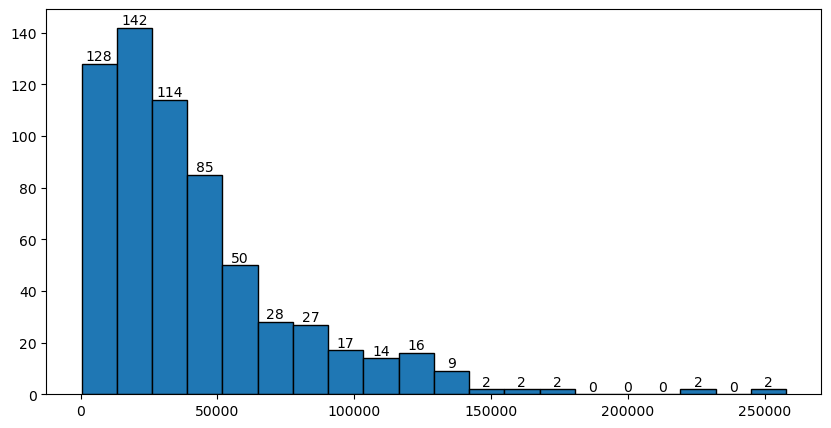

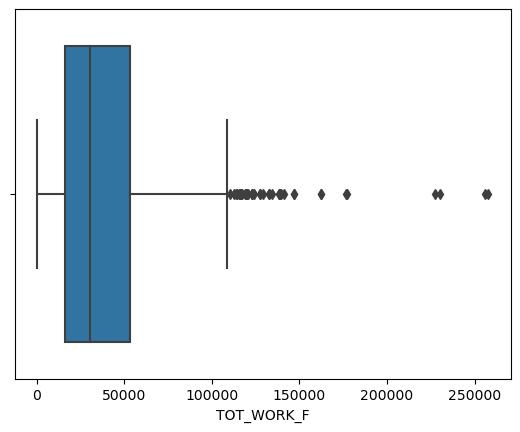

In [122]:
df_EDA = ['No_HH','M_LIT','F_LIT','TOT_WORK_M','TOT_WORK_F']
new_df = df[df_EDA].copy()
for x in df_EDA:
    univariateAnalysis_numeric(x,20)

No_HH
Skew : 2.02


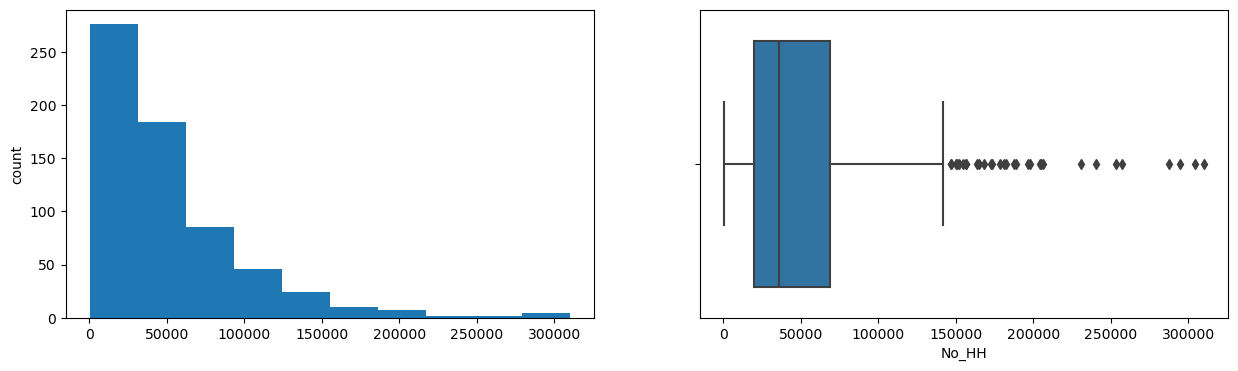

M_LIT
Skew : 2.34


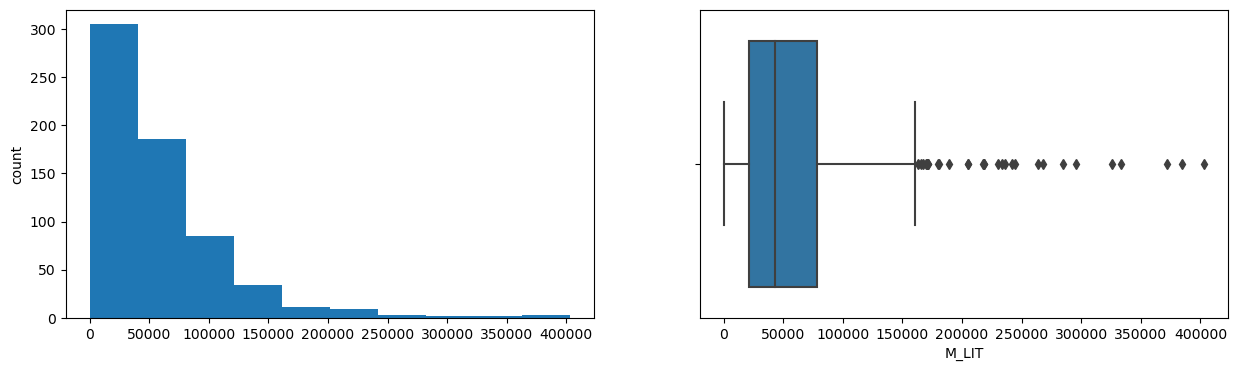

F_LIT
Skew : 3.15


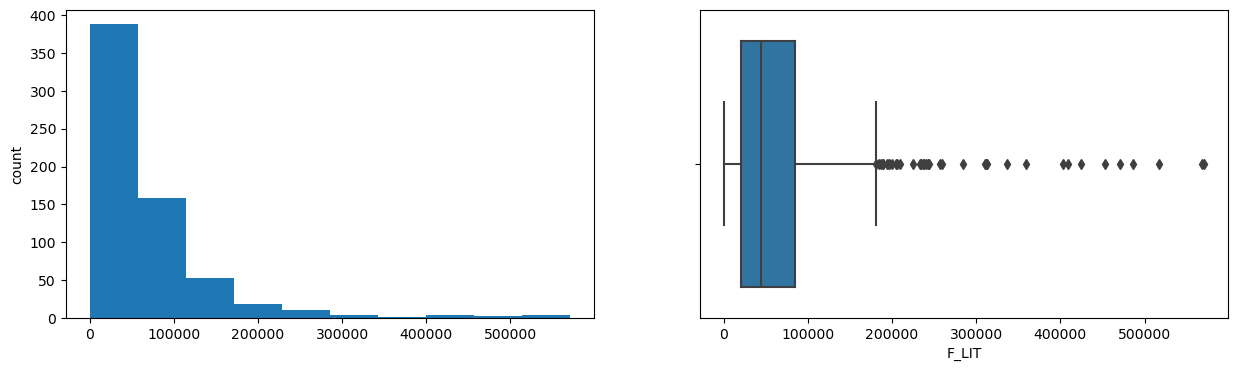

TOT_WORK_M
Skew : 2.3


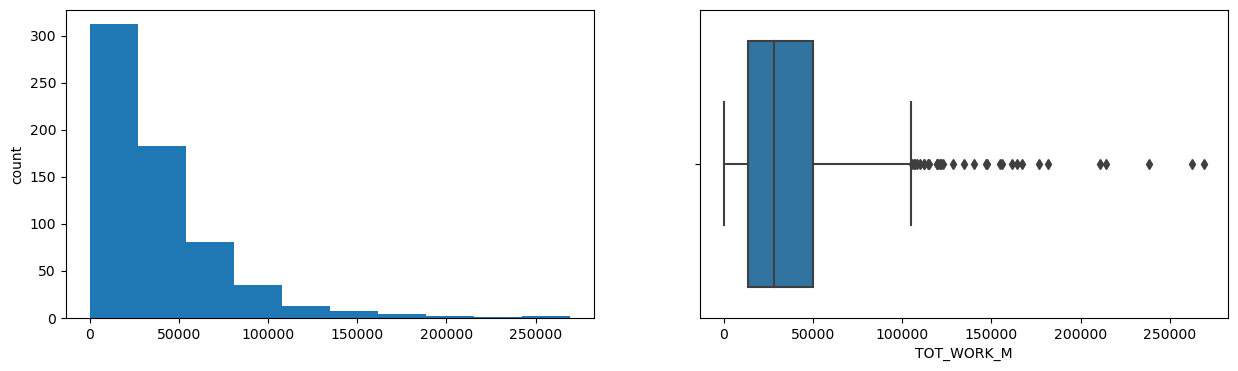

TOT_WORK_F
Skew : 1.93


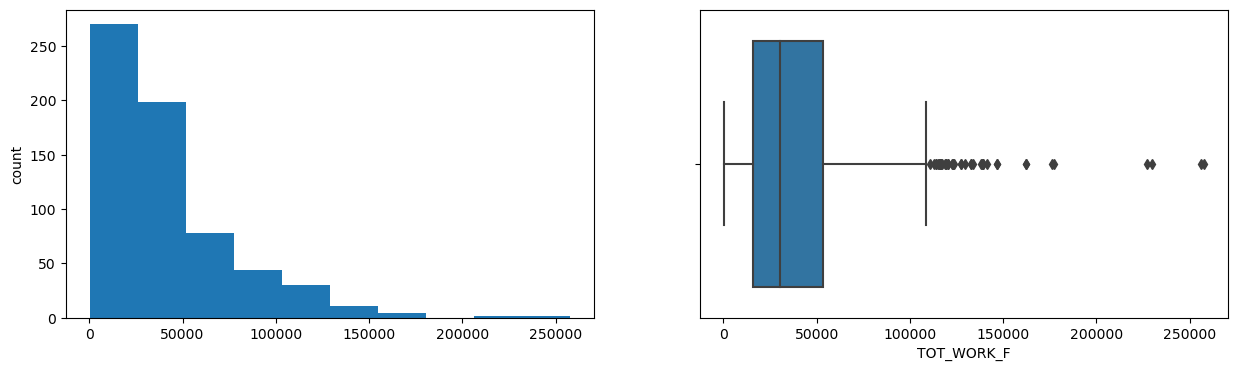

In [124]:
for col in new_df.columns:
    print(col)
    print('Skew :',round(new_df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    new_df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=new_df[col])
    plt.show()

In [115]:
corr = new_df.corr(method='pearson')

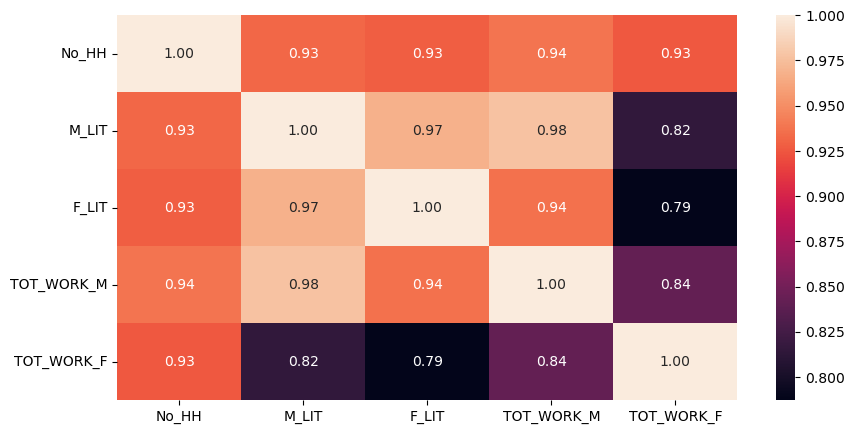

In [125]:
fig = plt.subplots(figsize=(10, 5))
sns.heatmap(new_df.corr(), annot=True,fmt='.2f')
plt.show()

In [36]:
df['TOT_LIT']=df['M_LIT']+df['F_LIT']

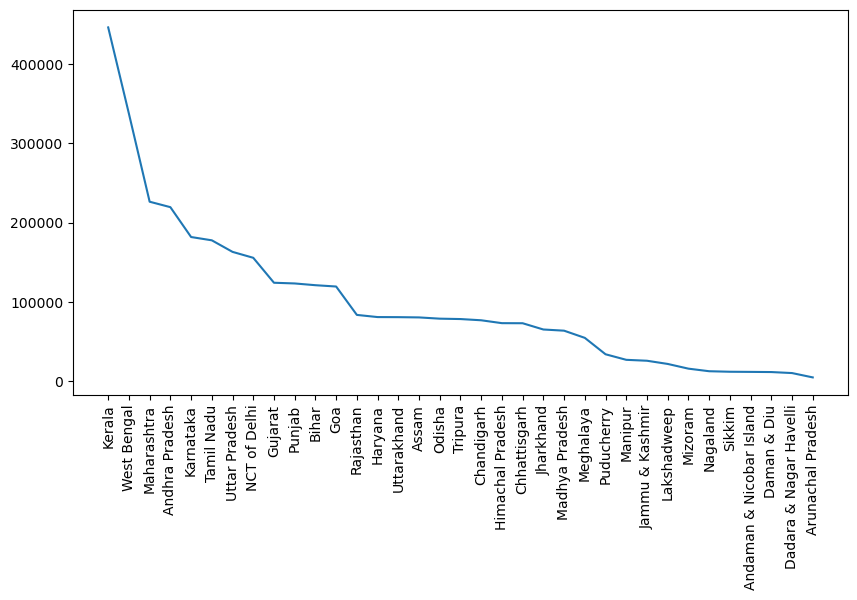

In [38]:
plt.figure(figsize=(10,5))
plt.plot(pd.DataFrame(df.groupby('State')['TOT_LIT'].mean()).sort_values(by='TOT_LIT',ascending=False));
plt.xticks(rotation=90);

In [39]:
a=(df['TOT_WORK_F'].sum())/(df['TOT_F'].sum())
b=(df['TOT_WORK_F'].sum())/(df['TOT_M'].sum())
print('percentage of working women is:',a*100,)
print('percentage of working men is:',b*100,)

percentage of working women is: 33.7460632042127
percentage of working men is: 51.658072424851355


In [42]:
df['TOT_M'].sum()/df['TOT_F'].sum()

0.6532582734925733

In [43]:
df['Gender_ratio']=df['TOT_M']/df['TOT_F']

In [44]:
df.sort_values(by='Gender_ratio',ascending=True).head(1)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F,TOT_SC,TOT_ST,TOT_LIT,Gender_ratio
546,28,547,Andhra Pradesh,Krishna,182404,137603,314182,14373,13978,31646,...,518,2961,52,189,462,1266,97869,14178,276447,0.437972


In [45]:
df.sort_values(by='Gender_ratio',ascending=False).head(1)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F,TOT_SC,TOT_ST,TOT_LIT,Gender_ratio
586,31,587,Lakshadweep,Lakshadweep,4445,12823,14772,1719,1587,0,...,0,0,13,7,749,352,0,27244,21935,0.868061


In [56]:
df_num = df.select_dtypes(include = ['int64'])


In [84]:
drop_columns=['TOT_SC','TOT_ST','TOT_LIT']
df_num= df_num.drop(columns=drop_columns)

In [89]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   No_HH           640 non-null    int64
 1   TOT_M           640 non-null    int64
 2   TOT_F           640 non-null    int64
 3   M_06            640 non-null    int64
 4   F_06            640 non-null    int64
 5   M_SC            640 non-null    int64
 6   F_SC            640 non-null    int64
 7   M_ST            640 non-null    int64
 8   F_ST            640 non-null    int64
 9   M_LIT           640 non-null    int64
 10  F_LIT           640 non-null    int64
 11  M_ILL           640 non-null    int64
 12  F_ILL           640 non-null    int64
 13  TOT_WORK_M      640 non-null    int64
 14  TOT_WORK_F      640 non-null    int64
 15  MAINWORK_M      640 non-null    int64
 16  MAINWORK_F      640 non-null    int64
 17  MAIN_CL_M       640 non-null    int64
 18  MAIN_CL_F       640 non-null  

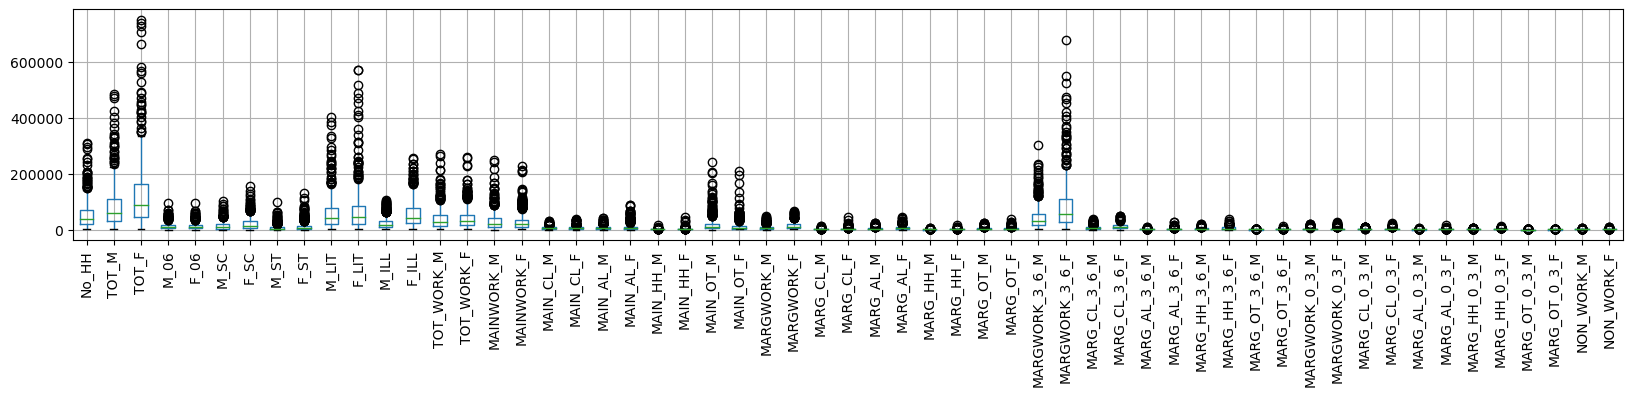

In [90]:
df_num.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [91]:
from scipy.stats import zscore
scaled_df=df_num.apply(zscore)
scaled_df.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


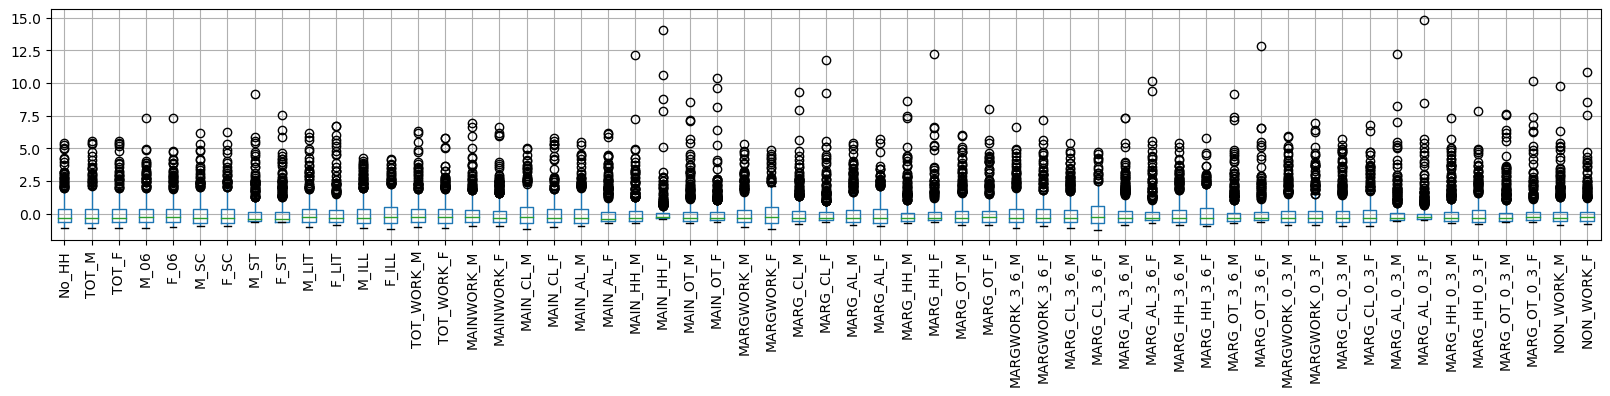

In [92]:
scaled_df.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()


#### Bartletts Test of Sphericity


- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated

In [93]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df)
p_value

0.0

#### KMO Test


In [94]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_df)
kmo_model

0.8039889932781813

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
df_pca = pca.fit_transform(scaled_df)
df_pca.transpose().round(2)

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       ...,
       [-0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.  ,  0.  , -0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.  , -0.  , -0.  , ...,  0.  ,  0.  ,  0.  ]])

In [96]:
print('Eigen Vectors \n %s',pca.components_.round(2))

Eigen Vectors 
 %s [[ 0.16  0.17  0.17 ...  0.13  0.15  0.13]
 [-0.13 -0.09 -0.1  ...  0.05 -0.07 -0.07]
 [-0.    0.06  0.04 ... -0.08  0.11  0.1 ]
 ...
 [ 0.   -0.25 -0.29 ... -0.01 -0.02  0.01]
 [ 0.   -0.05  0.16 ... -0.01  0.03  0.06]
 [ 0.   -0.46 -0.18 ... -0.01 -0.03 -0.  ]]


In [126]:
print('Eigen values \n %s',pca.explained_variance_.round(2))

Eigen values 
 %s [31.81  7.87  4.15  3.67  2.21  1.94]


In [128]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(2))

[0.56 0.14 0.07 0.06 0.04 0.03]


In [129]:
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [55.73 69.51 76.79 83.21 87.08 90.47]


### Scree plot

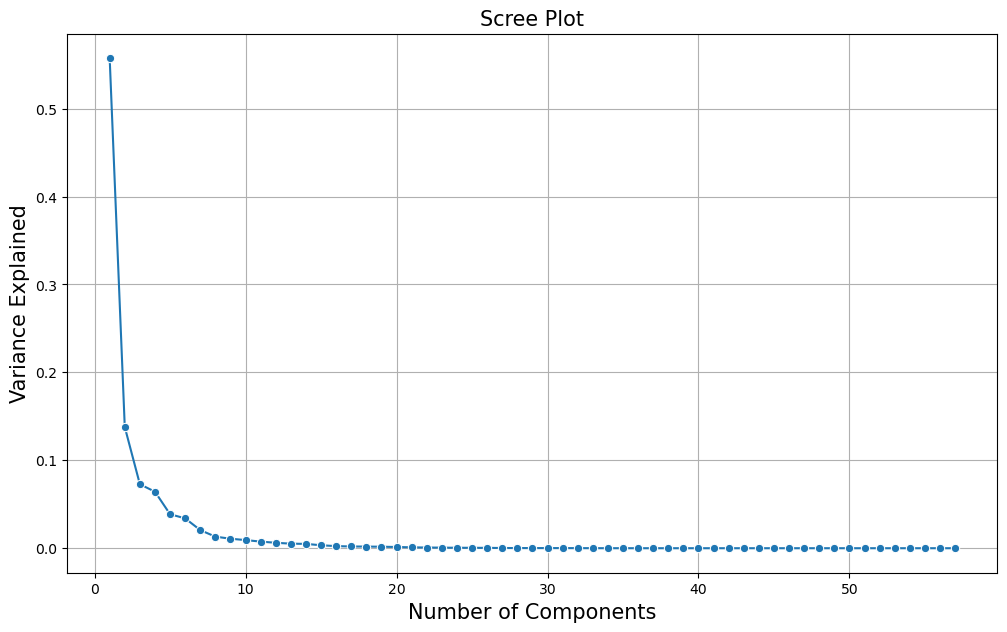

In [99]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

The number of components can be decided based upon the explained variance. Here, it is decided to keep the number of components as 6 as the cumulative explained variance is around 90%

In [130]:
from sklearn.decomposition import PCA


In [131]:
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(scaled_df)
df_pca.transpose().round(2) 

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       [ 1.54,  1.96,  0.62, ...,  1.37,  1.14,  1.11],
       [ 0.35, -0.15,  0.48, ...,  0.15,  0.06,  0.15],
       [-0.42,  0.42,  0.28, ...,  0.14, -0.12, -0.15]])

In [132]:
df_pca.shape

(640, 6)

In [133]:
pca.components_.round(2)

array([[ 0.16,  0.17,  0.17,  0.16,  0.16,  0.15,  0.15,  0.03,  0.03,
         0.16,  0.15,  0.16,  0.17,  0.16,  0.15,  0.15,  0.12,  0.1 ,
         0.07,  0.11,  0.07,  0.13,  0.08,  0.12,  0.11,  0.16,  0.16,
         0.08,  0.05,  0.13,  0.11,  0.14,  0.13,  0.16,  0.15,  0.16,
         0.16,  0.17,  0.16,  0.09,  0.05,  0.13,  0.11,  0.14,  0.12,
         0.15,  0.15,  0.15,  0.14,  0.05,  0.04,  0.12,  0.12,  0.14,
         0.13,  0.15,  0.13],
       [-0.13, -0.09, -0.1 , -0.02, -0.02, -0.05, -0.05,  0.03,  0.03,
        -0.12, -0.15, -0.01, -0.01, -0.13, -0.09, -0.18, -0.15,  0.06,
         0.09, -0.03, -0.06, -0.08, -0.08, -0.21, -0.21,  0.09,  0.13,
         0.27,  0.25,  0.17,  0.14,  0.07,  0.02, -0.09, -0.12, -0.04,
        -0.11,  0.08,  0.1 ,  0.26,  0.24,  0.16,  0.13,  0.06,  0.01,
        -0.09, -0.13,  0.15,  0.18,  0.25,  0.24,  0.19,  0.18,  0.08,
         0.05, -0.07, -0.07],
       [-0.  ,  0.06,  0.04,  0.06,  0.05,  0.  , -0.03, -0.12, -0.14,
         0.08,  0

In [134]:
var_exp_1 = pca.explained_variance_ratio_.round(2)

In [135]:
pca.explained_variance_ratio_.round(2)

array([0.56, 0.14, 0.07, 0.06, 0.04, 0.03])

In [136]:
df_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(scaled_df))
df_pca_loading.shape

(6, 57)

In [137]:
df_pca_loading.head(6)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.16,0.17,0.17,0.16,0.16,0.15,0.15,0.03,0.03,0.16,...,0.15,0.14,0.05,0.04,0.12,0.12,0.14,0.13,0.15,0.13
1,-0.13,-0.09,-0.10,-0.02,-0.02,-0.05,-0.05,0.03,0.03,-0.12,...,0.15,0.18,0.25,0.24,0.19,0.18,0.08,0.05,-0.07,-0.07
2,-0.00,0.06,0.04,0.06,0.05,0.00,-0.03,-0.12,-0.14,0.08,...,0.05,0.02,0.27,0.28,-0.14,-0.20,-0.02,-0.08,0.11,0.10
3,-0.13,-0.02,-0.07,0.01,0.01,0.01,-0.03,-0.22,-0.23,-0.04,...,0.09,-0.02,-0.10,-0.14,0.13,0.00,0.23,0.21,0.08,0.02
4,-0.01,-0.03,-0.01,-0.05,-0.04,-0.17,-0.16,0.43,0.44,-0.01,...,0.08,0.13,-0.05,-0.05,0.06,0.13,-0.04,0.00,0.16,0.24
5,0.00,-0.07,-0.04,-0.16,-0.15,-0.06,-0.04,0.22,0.23,-0.06,...,-0.06,-0.00,0.07,0.08,-0.12,-0.11,0.06,0.30,-0.05,-0.02


In [138]:
from matplotlib.patches import Rectangle

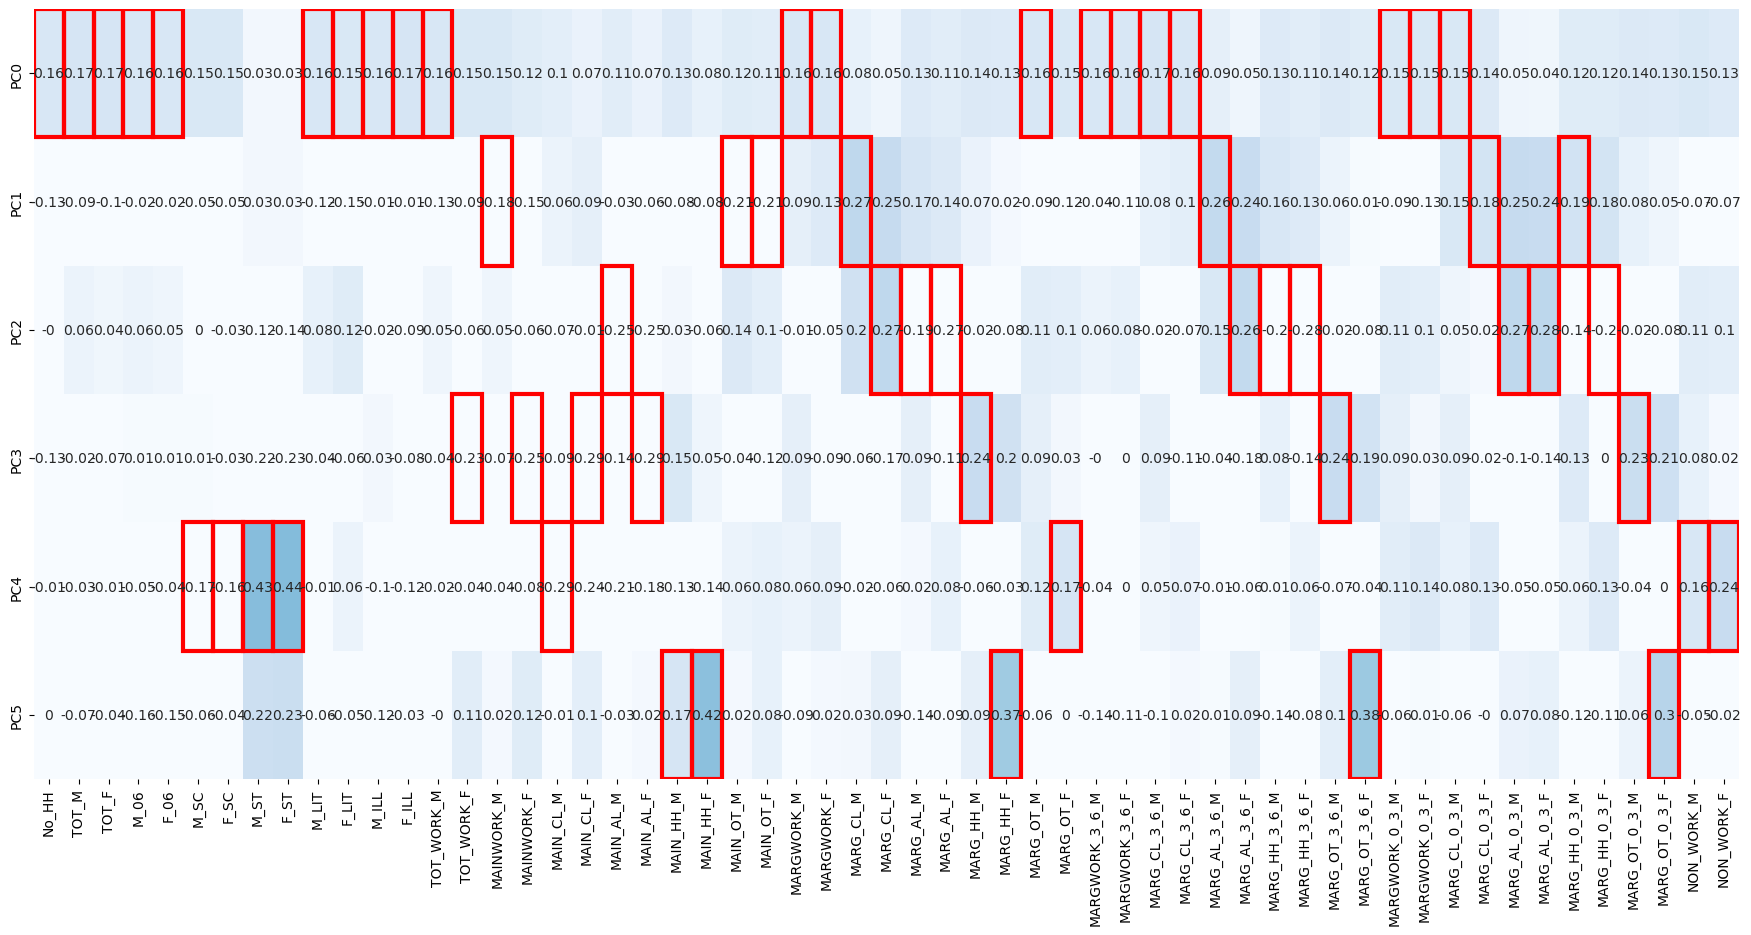

In [139]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [141]:
df_pca = pd.DataFrame(df_pca.round(2),columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-4.62,0.14,0.33,1.54,0.35,-0.42
1,-4.77,-0.11,0.24,1.96,-0.15,0.42
2,-5.96,-0.29,0.37,0.62,0.48,0.28
3,-6.28,-0.50,0.21,1.07,0.30,0.05
4,-4.48,0.89,1.08,0.54,0.80,0.34


In [143]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,-4.62,0.14,0.33,1.54,0.35,-0.42
1,-4.77,-0.11,0.24,1.96,-0.15,0.42
2,-5.96,-0.29,0.37,0.62,0.48,0.28
3,-6.28,-0.50,0.21,1.07,0.30,0.05
4,-4.48,0.89,1.08,0.54,0.80,0.34
...,...,...,...,...,...,...
635,-6.26,-0.85,0.24,1.17,0.06,-0.16
636,-5.77,-0.90,0.17,1.10,0.06,-0.16
637,-6.29,-0.64,0.11,1.37,0.15,0.14
638,-6.22,-0.67,0.27,1.14,0.06,-0.12


In [142]:
df_pca.shape

(640, 6)

In [113]:
loadings_pc1 = pca.components_[0]

In [114]:
pc1_equation = "PC1 = "
for i, loading in enumerate(loadings_pc1):
    pc1_equation += f"{loading:.3f} * X{i+1} + " if i < len(loadings_pc1) - 1 else f"{loading:.3f} * X{i+1}"

print(pc1_equation)

PC1 = 0.156 * X1 + 0.167 * X2 + 0.166 * X3 + 0.162 * X4 + 0.163 * X5 + 0.151 * X6 + 0.152 * X7 + 0.027 * X8 + 0.028 * X9 + 0.162 * X10 + 0.147 * X11 + 0.162 * X12 + 0.165 * X13 + 0.160 * X14 + 0.146 * X15 + 0.146 * X16 + 0.124 * X17 + 0.103 * X18 + 0.075 * X19 + 0.113 * X20 + 0.074 * X21 + 0.132 * X22 + 0.083 * X23 + 0.124 * X24 + 0.111 * X25 + 0.165 * X26 + 0.155 * X27 + 0.082 * X28 + 0.049 * X29 + 0.129 * X30 + 0.114 * X31 + 0.141 * X32 + 0.128 * X33 + 0.155 * X34 + 0.147 * X35 + 0.165 * X36 + 0.161 * X37 + 0.166 * X38 + 0.156 * X39 + 0.093 * X40 + 0.052 * X41 + 0.129 * X42 + 0.111 * X43 + 0.140 * X44 + 0.125 * X45 + 0.154 * X46 + 0.146 * X47 + 0.150 * X48 + 0.140 * X49 + 0.053 * X50 + 0.042 * X51 + 0.122 * X52 + 0.116 * X53 + 0.140 * X54 + 0.132 * X55 + 0.150 * X56 + 0.131 * X57
